- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [38]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [39]:
# modelos de regressão
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.neural_network import MLPRegressor

In [40]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [41]:
# modelos de aprendizado profundo
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from scikeras.wrappers import KerasRegressor

In [42]:
# modelos de séries temporais
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [43]:
# preparação e visualização de dados
# pandas, pandas_datareader, numpy e matplotlib
import numpy as np
#import pandas as pd
import pandas_datareader.data as web

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [44]:
# carregando arquivo clusterizado em dataframe
df_gold_trans = pd.read_csv('df_treated/df_gold_trans.csv')

In [45]:
# conferindo a dimensão do dataframe, linhas e colunas
df_gold_trans.shape

(1152, 41)

In [46]:
# ordenando pelo index o dataframe carregado
df_gold_trans = df_gold_trans.sort_index()

In [47]:
# reconhecendo as primeiras linhas do df
df_gold_trans.head(5)

,date,sp500 open,sp500 high,sp500 low,sp500 close,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq high-low,usd_chf,silver open,silver high,silver low,silver close,silver volume,oil high-low,gold open,gold high,gold low,gold close,standard__sp500 open,standard__sp500 high,standard__sp500 low,standard__sp500 close,standard__nasdaq open,standard__nasdaq high,standard__nasdaq low,standard__nasdaq close,standard__nasdaq high-low,standard__usd_chf,standard__silver open,standard__silver high,standard__silver low,standard__silver close,standard__silver volume,standard__oil high-low,standard__gold open,standard__gold high,standard__gold low,standard__gold close
0,2010-03-26,116.87,117.42,116.12,116.58,48.14,48.33,47.74,48.00,0.59,1.0662,16.79,16.92,16.70,16.92,238954.0,0.570,107.16,108.7000,106.82,108.59,-1.246059,-1.248261,-1.244905,-1.246771,-1.085768,-1.086593,-1.085878,-1.085816,-0.798516,2.291334,-0.663693,-0.672175,-0.657138,-0.666184,-0.611130,-0.481680,-1.249609,-1.261982,-1.257552,-1.269578
1,2010-03-30,117.46,117.83,116.91,117.40,48.36,48.55,48.06,48.39,0.49,1.0671,17.29,17.35,17.21,17.27,81770.0,0.420,108.57,108.6615,107.87,107.97,-1.243252,-1.244812,-1.243327,-1.243469,-1.085931,-1.085375,-1.088106,-1.087698,-0.647110,2.077103,-0.567484,-0.577339,-0.562312,-0.574735,-0.581854,-0.615492,-1.202071,-1.200889,-1.187512,-1.191842
2,2010-03-31,116.95,117.52,116.61,117.00,48.23,48.45,48.07,48.16,0.38,1.0528,17.53,17.59,17.41,17.45,76390.0,0.720,109.44,109.5000,108.85,108.95,-1.239538,-1.239967,-1.236518,-1.235545,-1.086586,-1.085213,-1.085218,-1.084016,-0.766072,2.191869,-0.557863,-0.553631,-0.544328,-0.536230,-0.412833,-0.109981,-1.182038,-1.183536,-1.175554,-1.170456
3,2010-04-07,118.80,119.36,117.81,118.36,48.69,48.87,48.37,48.63,0.50,1.0716,18.05,18.23,18.04,18.12,208058.0,0.640,111.85,112.9300,111.77,112.49,-1.227567,-1.230032,-1.222899,-1.227456,-1.080121,-1.081315,-1.078615,-1.080252,-0.881429,2.151701,-0.488913,-0.496729,-0.509994,-0.529813,-0.569045,-0.236359,-1.077455,-1.077251,-1.082964,-1.098490
4,2010-04-12,119.70,120.05,119.56,119.74,49.05,49.20,48.94,49.07,0.26,1.0598,18.38,18.46,18.11,18.12,102729.0,0.585,113.64,114.1300,112.98,113.01,-1.216918,-1.217551,-1.211356,-1.214662,-1.073330,-1.073274,-1.070940,-1.071578,-0.859800,2.145963,-0.498534,-0.497899,-0.475661,-0.486495,-0.618670,-0.422208,-1.102582,-1.091439,-1.087405,-1.076764


In [48]:
# verificando a posição de cada variável
df_gold_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1152 non-null   object 
 1   sp500 open                 1152 non-null   float64
 2   sp500 high                 1152 non-null   float64
 3   sp500 low                  1152 non-null   float64
 4   sp500 close                1152 non-null   float64
 5   nasdaq open                1152 non-null   float64
 6   nasdaq high                1152 non-null   float64
 7   nasdaq low                 1152 non-null   float64
 8   nasdaq close               1152 non-null   float64
 9   nasdaq high-low            1152 non-null   float64
 10  usd_chf                    1152 non-null   float64
 11  silver open                1152 non-null   float64
 12  silver high                1152 non-null   float64
 13  silver low                 1152 non-null   float

In [49]:
# separando variáveis independentes(x) e dependentes(y)
X = df_gold_trans[list(df_gold_trans.columns[21:40])]
y = df_gold_trans[['standard__gold close']]

In [50]:
print('X=', X.info())
print('y=', y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   standard__sp500 open       1152 non-null   float64
 1   standard__sp500 high       1152 non-null   float64
 2   standard__sp500 low        1152 non-null   float64
 3   standard__sp500 close      1152 non-null   float64
 4   standard__nasdaq open      1152 non-null   float64
 5   standard__nasdaq high      1152 non-null   float64
 6   standard__nasdaq low       1152 non-null   float64
 7   standard__nasdaq close     1152 non-null   float64
 8   standard__nasdaq high-low  1152 non-null   float64
 9   standard__usd_chf          1152 non-null   float64
 10  standard__silver open      1152 non-null   float64
 11  standard__silver high      1152 non-null   float64
 12  standard__silver low       1152 non-null   float64
 13  standard__silver close     1152 non-null   float

In [51]:
# separando os sets de treino e teste em 20% para teste e 80% para treino
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [52]:
# hiperparâmetros do CV
num_folds = 10
scoring = 'neg_mean_squared_error'

In [53]:
# implementando os modelos de ML
models = []

# regressão e árvore de regressão
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# rede neural
models.append(('MLP', MLPRegressor()))

# ensemble - boosting
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# ensemble - bagging
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [54]:
# analisando k-fold
names = []
kfold_results = []
test_results = []
train_results = []

for name, model in models:
    names.append(name)

    divisorC, divisorK=1, 1
    if name in ('EN', 'LASSO'): 
        divisorC=100 # modificando a escala para visualizar no gráfico   
        divisorK=10  
    else:
        if name in ('LR', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'): 
            divisorK=0.1 # modificando a escala para visualizar no gráfico            

    #divisorC, divisorK=1, 1

    # análise k-fold
    kfold = KFold(n_splits=num_folds, random_state=None)

    # erro quadrático médio convertido para positivo. Quanto menor melhor.
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring)
    kfold_results.append(cv_results/divisorK)

    # período completo de treinamento
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result/divisorC)

    # resultado dos testes
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result/divisorC)

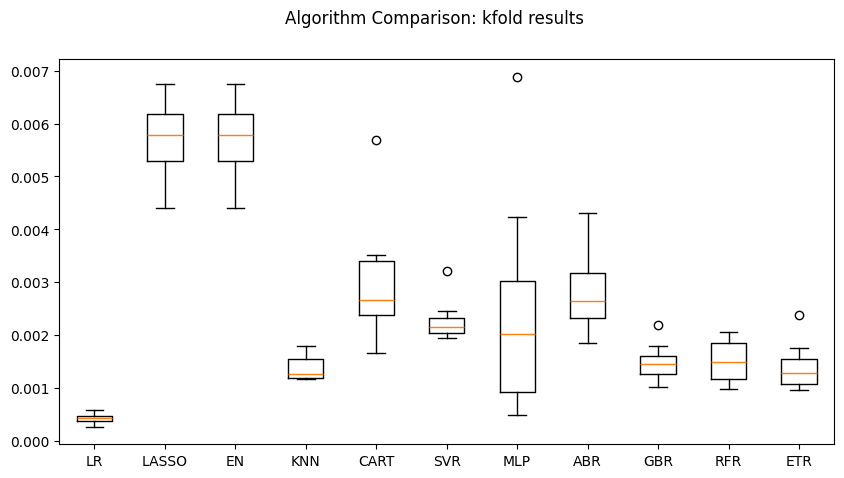

In [55]:
# comparando resultados da validação cruzada
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(10,5)
pyplot.show()

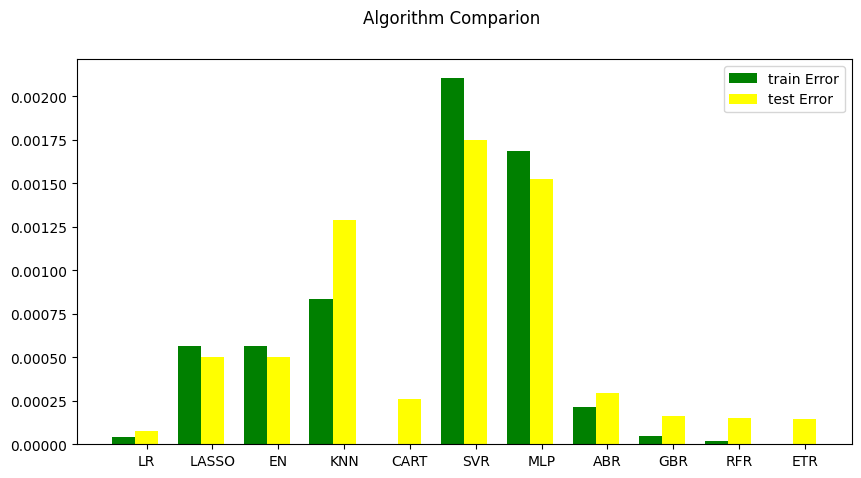

In [56]:
# analisando o erro de treinamento e de teste
# comparando algoritmos
fig = pyplot.figure()

ind = np.arange(len(names)) # as localidades x para os grupos
width = 0.35 # largura das barras

fig.suptitle('Algorithm Comparion')
ax = fig.add_subplot(111)
pyplot.bar(ind - width, train_results, width=width, label='train Error', color='green')
pyplot.bar(ind, test_results, width=width, label='test Error', color='yellow')
fig.set_size_inches(10,5)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.savefig('grafic_image/compara_erro.png', format='png')
pyplot.show()


In [57]:
# preparando conjunto de dados para modelos ARIMA
# deixando variáveis correlacionadas como variáveis exógenas

X_train_ARIMA = X_train.loc[:, list(X.columns)]
X_test_ARIMA = X_test.loc[:, list(X.columns)]

tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len(X)

In [58]:
# treinando o modelo ARIMA
import statsmodels.api as sm

model_arima = sm.tsa.arima.ARIMA(endog= Y_train, exog= X_train_ARIMA, order=[1,0,0])
ARIMAModel = model_arima.fit()

error_training_ARIMA = mean_squared_error(Y_train, ARIMAModel.fittedvalues)
predicated = ARIMAModel.predict(start= tr_len -1, end= to_len -1, exog= X_test_ARIMA)[1:]
error_test_ARIMA = mean_squared_error(Y_test, predicated)

In [59]:
print('error_training_ARIMA', error_training_ARIMA)
print('error_test_ARIMA', error_test_ARIMA)
#print('predicated', predicated.head(5))

error_training_ARIMA 3.9157343827620575e-05
error_test_ARIMA 7.461438658242766e-05


In [60]:
# treinando o modelo LST
seq_len = 2 #Comprimento da seq para o LSTM 
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test) 
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1])) 
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1])) 
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :] 
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [61]:
# LSTM Network 
def create_LSTMmodel(learn_rate = 0.01, momentum=0.0): 
    # criação do modelo 
    model = Sequential() 
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]))) 

    #Mais células podem ser acrescentadas, se necessário 
    model.add(Dense(1))
    optimizer = SGD(momentum=momentum) 
    #optimizer = SGD(lr=learn_rate, momentum=momentum) 
    model.compile(loss='mse', optimizer='adam') 
    return model 

In [62]:
LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum=0.0) 
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM,  
                    validation_data=(X_test_LSTM, Y_test_LSTM),
                    epochs=330, batch_size=72, verbose=0, shuffle=False)

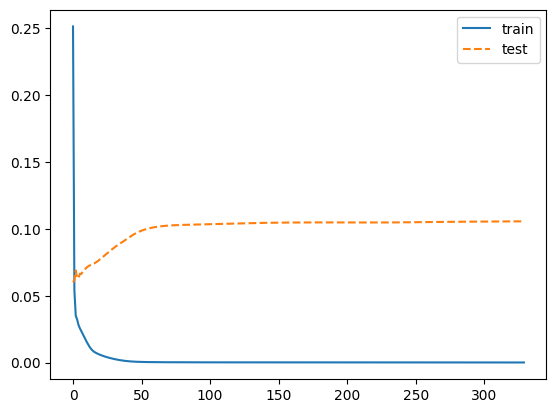

In [63]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train', ) 
pyplot.plot(LSTMModel_fit.history['val_loss'], '--',label='test',) 
pyplot.legend() 
pyplot.show()

In [64]:
error_training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM)) 
predicted = LSTMModel.predict(X_test_LSTM) 
error_test_LSTM = mean_squared_error(Y_test,predicted)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [65]:
test_results.append(error_test_ARIMA) 
test_results.append(error_test_LSTM) 
train_results.append(error_training_ARIMA) 
train_results.append(error_training_LSTM)

In [66]:
names.append('ARIMA') 
names.append('LSTM')

In [67]:
def evaluate_arima_model(arima_order):
    #previsto = list() 
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order) 
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues) 
    return error     

In [68]:
# avaliar combinações dos valores de p, d e q para um modelo ARIMA 
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float('inf'), None 
    for p in p_values: 
        for d in d_values: 
            for q in q_values: 
                order = (p,d,q) 
                try:                   
                    mse = evaluate_arima_model(order) 
                    if mse < best_score: 
                        best_score, best_cfg = mse, order 
                        print('ARIMA%s MSE=%.7f' % (order,mse)) 
                except: 
                    continue 
                print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score)) 

In [69]:
# avaliação de parâmetros 
p_values = [0, 1, 2] 
d_values = range(0, 2) 
q_values = range(0, 2) 
warnings.filterwarnings('ignore')
evaluate_models(p_values, d_values, q_values)

In [70]:
# preparação do modelo

from statsmodels.tsa.arima.model import ARIMA

modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1]) 
model_fit_tuned = modelARIMA_tuned.fit() 

In [71]:
# estimar a acurácia no conjunto de validação 
predicted_tuned = model_fit.predict(start = tr_len -1 , end = to_len -1, exog = X_test_ARIMA)[1:] 
print(mean_squared_error(Y_test,predicted_tuned))

NameError: name 'model_fit' is not defined

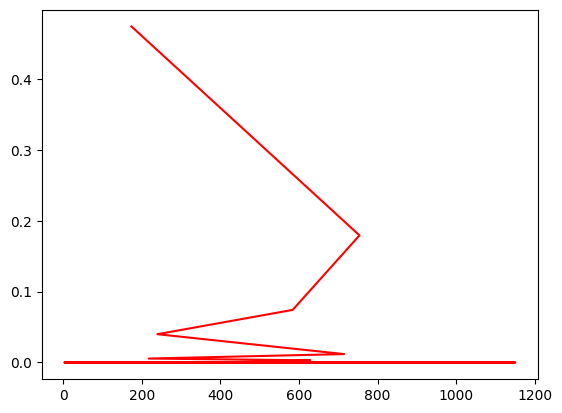

In [ ]:
# plotar os dados reais comparados com os previstos 
predicted_tuned.index = Y_test.index 
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',) 

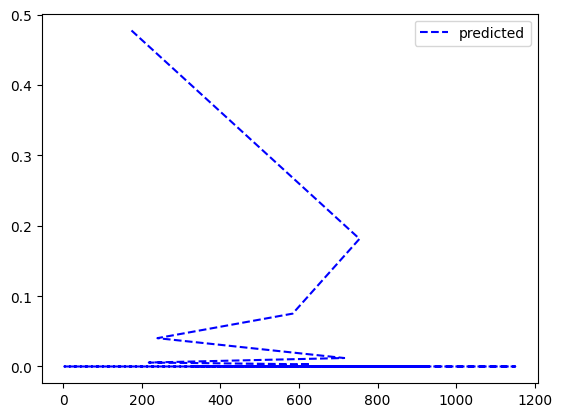

In [ ]:
# plotar t e a de forma separada 
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted') 
pyplot.legend() 
pyplot.rcParams['figure.figsize'] = (8,5) 
pyplot.show()